In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import seaborn as sns

# Import the 3 datasets.

## tdf_stages

In [237]:
tdf_stages = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_stages.csv')

tdf_stages.head(3)

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK


Length of tdf_stages:

In [238]:
len(tdf_stages)

2236

## stage_data

In [239]:
stage_data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/stage_data.csv')
stage_data.head(3)

,edition,year,stage_results_id,rank,time,rider,age,team,points,elapsed,bib_number
0,1,1903,stage-1,1,13S,Garin Maurice,32.0,NaN,100.0,13S,NaN
1,1,1903,stage-1,2,55S,Pagie Émile,32.0,NaN,70.0,8S,NaN
2,1,1903,stage-1,3,59S,Georget Léon,23.0,NaN,50.0,12S,NaN


Length of stage_data:

In [240]:
len(stage_data)

255752

## tdf_winners

In [241]:
tdf_winners = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')
tdf_winners.head(3)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France


Length of tdf_winners

In [242]:
len(tdf_winners)

106

Since the data is now loaded, we can start cleaning the data:

# Cleaning the data:


**Note:** If less than <u>5% of the data consists of null values, we can omit the respective rows</u>. <br> We can use other alternatives otherwise.

### Looking at individual dataset:

### Cleaning tdf_stages

Rows with missing values (**Detecting NaN**)

In [505]:
tdf_stages[tdf_stages.isna().any(axis=1)]

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country


Number of rows with missing data from *tdf_stages*:

In [244]:
len(tdf_stages[tdf_stages.isna().any(axis=1)])

52

**Percentage of rows with missing values.**

In [245]:
print(f"{round(len(tdf_stages[tdf_stages.isna().any(axis=1)])/len(tdf_stages),4)*100}%")

2.33%


Since the percentage is below 5%, we can remove the rows.

In [246]:
# dropping the rows with null values:
tdf_stages=tdf_stages.dropna(axis=0)

In [247]:
len(tdf_stages)

2184

We have removed the null rows from the dataset. We can move forward with other dataset.

### Cleaning stage_data

In [248]:
stage_data.head(3)

,edition,year,stage_results_id,rank,time,rider,age,team,points,elapsed,bib_number
0,1,1903,stage-1,1,13S,Garin Maurice,32.0,NaN,100.0,13S,NaN
1,1,1903,stage-1,2,55S,Pagie Émile,32.0,NaN,70.0,8S,NaN
2,1,1903,stage-1,3,59S,Georget Léon,23.0,NaN,50.0,12S,NaN


Which of these columns contains **Nan** values and how many?

In [249]:
pd.isnull(stage_data).sum()

edition                  0
year                     0
stage_results_id         0
rank                     0
time                  5617
rider                    0
age                   3326
team                 24043
points              222746
elapsed               5617
bib_number           23534
dtype: int64

Let's look at the column '*time*'. It has 5617 null values. <br>
We can make the column a numeric type and evaluate the data.

In [250]:
# applying the regular expression to the column time to remove only the numeric values in the column
stage_data['time']=stage_data['time'].str.extract(r'(\d+)')

# Converting the column into a integer type one:
stage_data['time'] = pd.to_numeric(stage_data['time'],downcast='integer')


Focusing on `stage_data['stage_results_id']`

In [251]:
stage_data['stage_results_id'].unique()

array(['stage-1', 'stage-2', 'stage-3', 'stage-4', 'stage-5', 'stage-6',
       'stage-7', 'stage-8', 'stage-9', 'stage-10', 'stage-11',
       'stage-12', 'stage-13', 'stage-14', 'stage-15', 'stage-16',
       'stage-17', 'stage-18', 'stage-19', 'stage-20', 'stage-21',
       'stage-22', 'stage-21a', 'stage-21b', 'stage-5a', 'stage-5b',
       'stage-13a', 'stage-13b', 'stage-14a', 'stage-14b', 'stage-18a',
       'stage-18b', 'stage-19a', 'stage-19b', 'stage-20a', 'stage-20b',
       'stage-11a', 'stage-11b', 'stage-12a', 'stage-12b', 'stage-17a',
       'stage-17b', 'stage-4a', 'stage-4b', 'stage-6a', 'stage-6b',
       'stage-10a', 'stage-10b', 'stage-2a', 'stage-2b', 'stage-8a',
       'stage-8b', 'stage-16a', 'stage-16b', 'stage-1a', 'stage-1b',
       'stage-3a', 'stage-3b', 'stage-15a', 'stage-15b', 'stage-22a',
       'stage-22b', 'stage-0', 'stage-7a', 'stage-7b', 'stage-9a',
       'stage-9b'], dtype=object)

It seems that there are several stage ids and it is also divided into different sections, (a,b,c). <br>
We can divide this column into two columns. One column will contain the numerical part and the other will contain the section (a,b,c) part. We can do this with **regex**.

In [259]:
# Creating separate column for numeric part:
stage_data['stage_results_id_numeric'] = stage_data['stage_results_id'].str.extract(r'(\d+)')

In [265]:
stage_data['stage_results_id_section'] = stage_data['stage_results_id'].str.extract("(a|b|c)$")

In [374]:
stage_data['stage_results_id_section'].unique()

array(['main', 'a', 'b'], dtype=object)

Replacing the *nan* values with 'main', I'll regard the stages with no sections with 'main' stage.

In [271]:
stage_data['stage_results_id_section'] = stage_data['stage_results_id_section'].replace(to_replace=np.nan,
                                                                                        value='main')

In [272]:
stage_data['stage_results_id_section'].unique()

array(['main', 'a', 'b'], dtype=object)

Dropping the `stage_results_id` column since we have extracted the data from it already.

In [279]:
stage_data = stage_data.drop('stage_results_id',axis=1)

Checking if there are any columns with null values:

In [280]:
pd.isnull(stage_data).sum()

edition                          0
year                             0
rank                             0
time                          5617
rider                            0
age                           3326
team                         24043
points                      222746
elapsed                       5617
bib_number                   23534
stage_results_id_numeric         0
stage_results_id_section         0
dtype: int64

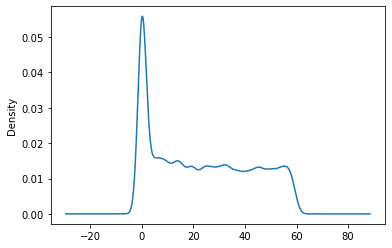

In [289]:
# plotting density plot for 'time'
stage_data['time'].plot.kde()

As the 'time' column is important, we can't simply omit it. <br> We can see that the numbers vary from 0 to 60 seconds. We can take the average value of the racers and substitute that in place of null values.

In [331]:
# Mean:
m = stage_data['time'].mean()

# Substituting the value in place of null values in 'time' column.
stage_data['time'] = stage_data['time'].replace(np.nan,m)

In [333]:
np.isnan(stage_data['time']).sum()

0

**We have successfully removed null values from the `time` column**. <br> We can move to `age` column.

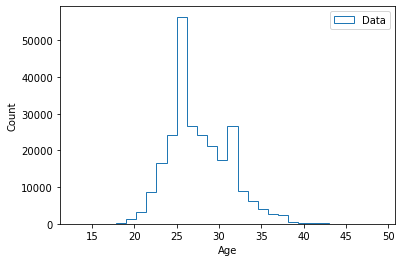

In [344]:
plt.hist(x='age', data=stage_data, histtype='step',bins=30,label='Data')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

We see that this data is approximately poisson or gamma.
https://www.datacamp.com/community/tutorials/probability-distributions-python

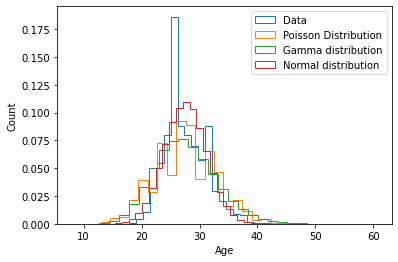

In [391]:
# random poisson distribution:
size = 300000
poisson_dist_age = np.random.poisson(lam=stage_data['age'].mean(), size=size)
gamma_dist_age = np.random.gamma(shape=stage_data['age'].mean(), size=size)
normal_dist_age = np.random.normal(loc=stage_data['age'].mean(), scale=stage_data['age'].std(),size=size)

plt.hist(x='age', data=stage_data, histtype='step',bins=30,label='Data',density=True)
plt.hist(poisson_dist_age,label='Poisson Distribution',histtype='step',bins=30,density=True)
plt.hist(gamma_dist_age,histtype='step',label='Gamma distribution',bins=30,density=True)
plt.hist(normal_dist_age,histtype='step',label='Normal distribution',bins=30,density=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Normal distribution works best here, we can replace the null values in `age` column with the normally distributed values with,<br> $\mu$ = mean of `age` <br>
$\sigma$ = standard deviation of `age`

**Replacing the null values with normally distributed values**:

In [493]:
np.random.normal(loc=stage_data['age'].mean(), scale=stage_data['age'].std(),size=20)

for i in range(len(stage_data)):
    # check if the ith element in `age` row is a null value
    if pd.isna(stage_data.loc[i,'age']):
        # replace the null value with a number which follows a normal distribution: 
        stage_data.loc[i,'age'] = np.random.normal(loc=stage_data['age'].mean(),
                                                scale=stage_data['age'].std(),
                                                size=1)
    else:
        pass

print(f"Number of null values (in `age`): {pd.isnull(stage_data['age']).sum()}")

Number of null values (in `age`): 0


We have replaced null values from the `age` column. We can now move foward. We will check again on which columns have null values.

In [449]:
pd.isnull(stage_data).sum()

edition                          0
year                             0
rank                             0
time                             0
rider                            0
age                              0
team                         24043
points                      222746
elapsed                       5617
bib_number                   23534
stage_results_id_numeric         0
stage_results_id_section         0
dtype: int64

We will focus on `team`.
https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-04-07/readme.md#:~:text=Team%20(NA%20if%20not%20on%20team)

the document tells us that if the player is not in the team the value is given to be `NA` (null).
We can replace this value with `"No Team"`

In [454]:
stage_data['team'] = stage_data['team'].replace(np.nan,'No Team')

In [458]:
# checking if the null values have gone or not.
pd.isnull(stage_data['team']).sum()

0

We have successfully remove the null values from the `team` column in `stage_data` dataset and switched it to "*No team*"

We can move on to the next column which contains null values.

**`elapsed` column**

In [459]:
pd.isnull(stage_data).sum()

edition                          0
year                             0
rank                             0
time                             0
rider                            0
age                              0
team                             0
points                      222746
elapsed                       5617
bib_number                   23534
stage_results_id_numeric         0
stage_results_id_section         0
dtype: int64

In [466]:
# applying the regular expression to the column time to remove only the numeric values in the column
stage_data['elapsed']=stage_data['elapsed'].str.extract(r'(\d+)')

# Converting the column into a integer type one:
stage_data['elapsed'] = pd.to_numeric(stage_data['elapsed'],downcast='integer')

(array([12806.,  8153.,  7804.,  8822.,  8828.,  7918.,  7498.,  8834.,
         8347.,  7759.,  8404.,  7367.,  7786.,  7457.,  7453.,  8369.,
         8987.,  7778.,  9374.,  8161.,  7111.,  8633.,  8787.,  8105.,
         7924.,  9726.,  8397.,  7484.,  7857.,  8206.]),
 array([ 0.        ,  1.96666667,  3.93333333,  5.9       ,  7.86666667,
         9.83333333, 11.8       , 13.76666667, 15.73333333, 17.7       ,
        19.66666667, 21.63333333, 23.6       , 25.56666667, 27.53333333,
        29.5       , 31.46666667, 33.43333333, 35.4       , 37.36666667,
        39.33333333, 41.3       , 43.26666667, 45.23333333, 47.2       ,
        49.16666667, 51.13333333, 53.1       , 55.06666667, 57.03333333,
        59.        ]),
 <a list of 30 Patch objects>)

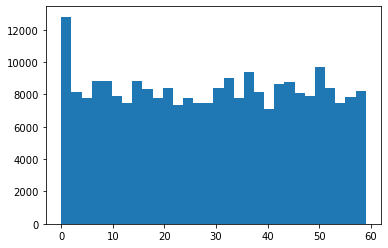

In [467]:
plt.hist(stage_data['elapsed'],bins=30)

The data seems fairly **uniform** in nature. We can find the mean of the values in `elapsed` column like we did for the `time` column and substitute it in place of null values.

In [468]:
# Mean
m = stage_data['elapsed'].mean() #seconds

# substituting it in place of null values:
stage_data['elapsed'] = stage_data['elapsed'].replace(np.nan,m)

In [469]:
# Checking if the null values are gone or not.
pd.isnull(stage_data['elapsed']).sum()

0

We are done with `elapsed` column. Moving on to other columns.

Checking columns containing null values.

In [470]:
pd.isnull(stage_data).sum()

edition                          0
year                             0
rank                             0
time                             0
rider                            0
age                              0
team                             0
points                      222746
elapsed                          0
bib_number                   23534
stage_results_id_numeric         0
stage_results_id_section         0
dtype: int64

Removing the `points` column, since there are too many missing values.


In [483]:
# Re-assigning the dataframe
stage_data = stage_data.drop(labels='points',axis=1)

In [484]:
pd.isnull(stage_data).sum()

edition                         0
year                            0
rank                            0
time                            0
rider                           0
age                             0
team                            0
elapsed                         0
bib_number                  23534
stage_results_id_numeric        0
stage_results_id_section        0
dtype: int64

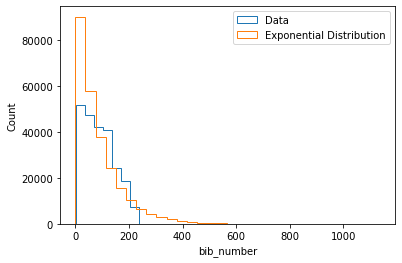

In [494]:
plt.hist(stage_data['bib_number'],histtype='step',label='Data',bins=30)

# Plotting an exponential random sample with rate = 1/(mean(bib_number))
plt.hist(np.random.exponential(stage_data['bib_number'].mean(),
                               size=len(stage_data)),
         histtype='step',
         label='Exponential Distribution',
        bins=30)

plt.xlabel('bib_number')
plt.ylabel('Count')
plt.legend()
plt.show()

We can replace the null value of the `bib_number` with random numbers following this exponential distribution.

In [495]:
for i in range(len(stage_data)):
    # check if the ith element in `age` row is a null value
    if pd.isna(stage_data.loc[i,'bib_number']):
        # replace the null value with a number which follows a exponential distribution: 
        stage_data.loc[i,'bib_number'] = np.random.exponential(stage_data['bib_number'].mean(),
                                                               size=1)
    else:
        pass

print(f"Number of null values (in `bib_number`): {pd.isnull(stage_data['bib_number']).sum()}")

Number of null values (in `bib_number`): 0


In [496]:
pd.isnull(stage_data).sum()

edition                     0
year                        0
rank                        0
time                        0
rider                       0
age                         0
team                        0
elapsed                     0
bib_number                  0
stage_results_id_numeric    0
stage_results_id_section    0
dtype: int64

#### Saving the cleaned stage_date csv:

In [497]:
# stage_data.to_csv('CLEANED_stage_data.csv')

### Cleaning tdf_winners

In [508]:
pd.isnull(tdf_winners).sum()

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      8
time_margin       8
stage_wins        0
stages_led        0
height           40
weight           39
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64

Plotting the the `height` column and seeing how it is distributed.

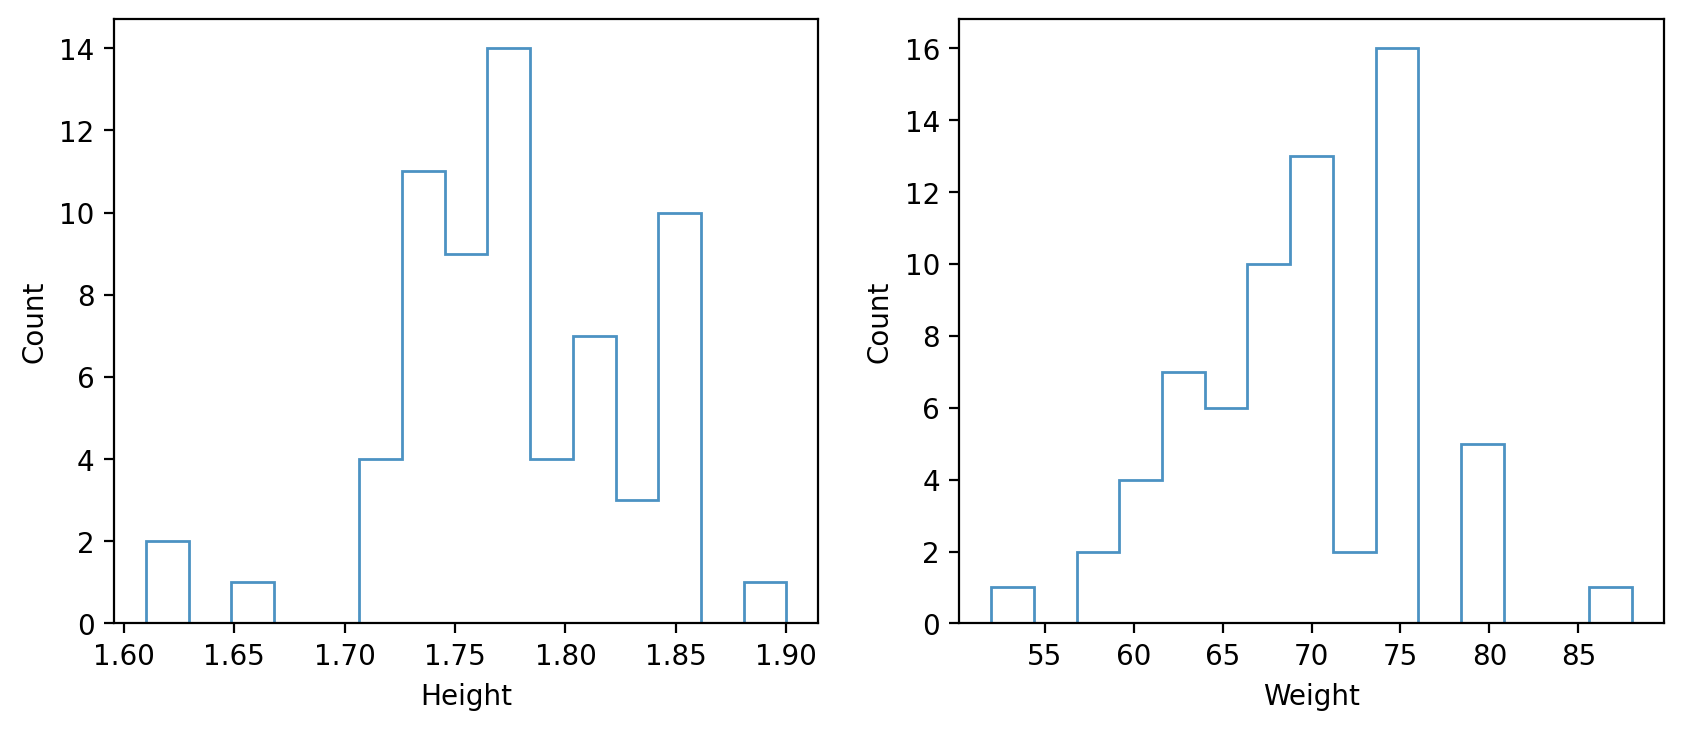

In [553]:
fig,ax = plt.subplots(1,2,figsize=(10,4),dpi=200)
# fig.figsize(10,5)
ax[0].hist(tdf_winners['height'],histtype='step',alpha=0.8,bins=15)
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Count')

ax[1].hist(tdf_winners['weight'],histtype='step',alpha=0.8, bins=15)
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('Count')
plt.show()

The data looks like it can be approximated with a normal distribution.<br>
We can substitute the null values in `height` and `weight` with truncated normal distribution. 

In [554]:
# Truncating the normal distribution:
def truncated_normal(mean, std, size,  min_, max_):
    """
    Returns a truncated normal distribution"""
    return np.clip(np.random.normal(loc = mean, scale = std, size=size),min_, max_)

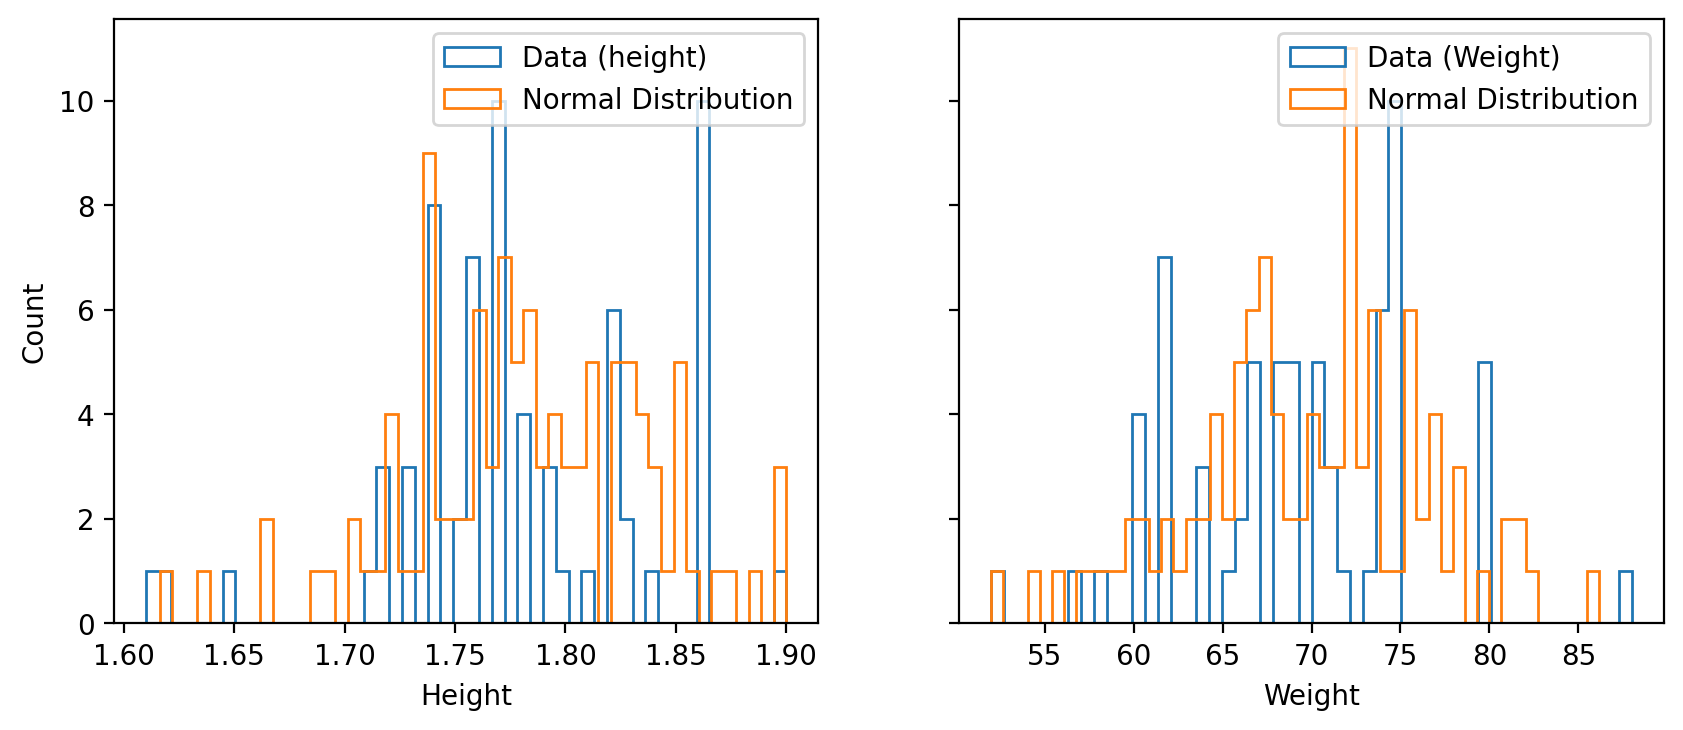

In [565]:
fig,ax = plt.subplots(1,2,figsize=(10,4),dpi=200,sharey=True)


ax[0].hist(tdf_winners['height'],bins=50,histtype='step',label='Data (height)')
ax[0].hist(truncated_normal(mean=tdf_winners['height'].mean(),std=tdf_winners['height'].std(),
                          size=len(tdf_winners),
                         min_=tdf_winners['height'].min(),
                         max_=tdf_winners['height'].max()),
        histtype='step',
        bins=50,
        label='Normal Distribution')
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Count')
ax[0].legend()
ax[1].hist(tdf_winners['weight'],bins=50,histtype='step',label='Data (Weight)')
ax[1].hist(truncated_normal(mean=tdf_winners['weight'].mean(),std=tdf_winners['weight'].std(),
                          size=len(tdf_winners),
                         min_=tdf_winners['weight'].min(),
                         max_=tdf_winners['weight'].max()),
        histtype='step',
        bins=50,
        label='Normal Distribution')

ax[1].set_xlabel('Weight')

ax[1].legend()
plt.show()

In [566]:
# Substituting null values with these normally distributed values.
for i in range(len(tdf_winners)):
    # check if the ith element in `height` row is a null value
    if pd.isna(tdf_winners.loc[i,'height']):
        # replace the null value with a number which follows a normal distribution: 
        tdf_winners.loc[i,'height'] = truncated_normal(mean=tdf_winners['height'].mean(),
                                                       std=tdf_winners['height'].std(),
                                                       size=1,
                                                       min_=tdf_winners['height'].min(),
                                                       max_=tdf_winners['height'].max())
    else:
        pass

print(f"Number of null values (in `height`): {pd.isnull(tdf_winners['height']).sum()}")

Number of null values (in `height`): 0


In [567]:
# Substituting null values with these normally distributed values.
for i in range(len(tdf_winners)):
    # check if the ith element in `weight` row is a null value
    if pd.isna(tdf_winners.loc[i,'weight']):
        # replace the null value with a number which follows a normal distribution: 
        tdf_winners.loc[i,'weight'] = truncated_normal(mean=tdf_winners['weight'].mean(),
                                                       std=tdf_winners['weight'].std(),
                                                       size=1,
                                                       min_=tdf_winners['weight'].min(),
                                                       max_=tdf_winners['weight'].max())
    else:
        pass

print(f"Number of null values (in `weight`): {pd.isnull(tdf_winners['weight']).sum()}")

Number of null values (in `weight`): 0


We have removed null values from `height` and `weight` columns.

In [571]:
pd.isnull(tdf_winners).sum()

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      8
time_margin       8
stage_wins        0
stages_led        0
height            0
weight            0
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64

### Dropping not so useful columns:

In [592]:
tdf_winners = tdf_winners.drop(labels=['nickname','full_name','died'],axis=1)

In [593]:
pd.isnull(tdf_winners).sum()

edition          0
start_date       0
winner_name      0
winner_team      0
distance         0
time_overall     8
time_margin      8
stage_wins       0
stages_led       0
height           0
weight           0
age              0
born             0
birth_town       0
birth_country    0
nationality      0
dtype: int64

In [604]:
tdf_winners.corr()['time_overall'].sort_values()

edition        -0.819670
weight         -0.051982
height          0.005855
stages_led      0.058961
stage_wins      0.069780
age             0.163023
time_margin     0.424676
distance        0.930210
time_overall    1.000000
Name: time_overall, dtype: float64

In [606]:
tdf_winners.corr()['time_margin'].sort_values()

edition        -0.587404
height         -0.160258
weight         -0.092943
stages_led     -0.039974
stage_wins      0.085307
age             0.101279
distance        0.166759
time_overall    0.424676
time_margin     1.000000
Name: time_margin, dtype: float64

We can set up a linear model between `distance` and `time_overall` since the R *(correlation coefficient)* value is high.<br>
Similarly, we can set a linear model between `time_margin` and (`time_overall` or `edition`).

**We will do this in R**

## Note: Will convert the code to R now